<a href="https://colab.research.google.com/github/sspaulc/sturdy-computing-machine/blob/main/Early_detection_of_lung_cancer_with_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
raw_data= pd.read_csv("/content/lung_cancer_examples.csv")

In [11]:
data=raw_data.drop(['Name'],axis=1)  
 
data= data.drop(['Surname'],axis=1)  

In [12]:
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [19]:
 data.shape

(59, 5)

In [20]:
data_no_null=  data.dropna(axis=0)

In [21]:
y= data_no_null.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [22]:
x= data_no_null.iloc[:,:-1]
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [23]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state= 0)

In [24]:
x_train.shape

(47, 4)

In [25]:
y_train.shape

(47,)

In [26]:
x_test.shape

(12, 4)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
y_predicted =  classifier.predict(x_test)
y_predicted

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [33]:
y_predicted.shape

(12,)

In [34]:
y_test

26    0
35    0
43    1
28    1
11    0
2     0
34    0
46    0
40    1
22    0
4     1
10    0
Name: Result, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score, auc
accuracy_score(y_test,y_predicted)*100

91.66666666666666

In [36]:
data.iloc[-1]

Age       51
Smokes    25
AreaQ      9
Alkhol     0
Result     0
Name: 58, dtype: int64

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

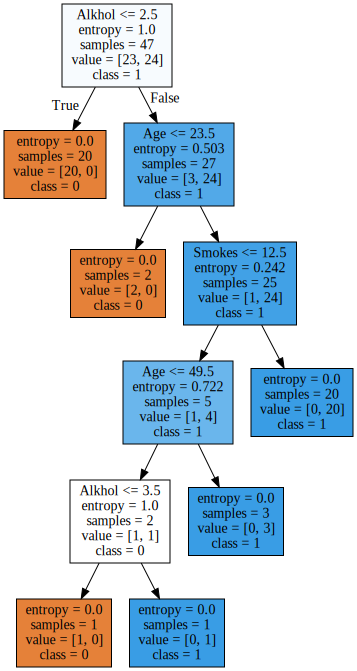

In [38]:
graph = Source(tree.export_graphviz( classifier, out_file=None
   , feature_names=x_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))